In [2]:
#Importacion
import os
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk, rectangle, diamond, square

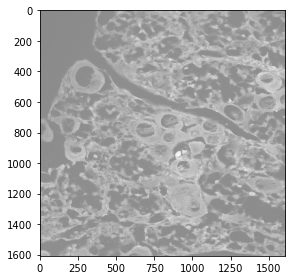

In [3]:
#BR
#Importar las librerias

import numpy as np

from skimage import io, color, filters
from skimage.color import rgb2hed, hed2rgb

img = io.imread("h-16-1738-40x-hem-05.png")  #leer Imagen

#planos RGB

R=img[:, :, 0] #Plano Rojo
G=img[:, :, 1] #Plano Verde
B=img[:, :, 2] #Plano Azul


#transladar de imagenes a matrices de numpy

R = np.array(R)+.0
G = np.array(G)+.0
B = np.array(B)+.0

BR = np.empty_like(img) #matriz de ceros

#formula de RGB a Blue-ratio ((100*B)/(1+R+G))*(256/(1+B+R+G))

BR = (np.multiply(np.divide(np.multiply(100.0,B,dtype=float),np.add(np.add(1.0,R),G,dtype=float),dtype=float),np.divide(256.0,np.add(np.add(np.add(1.0,B),R),G,dtype=float),dtype=float),dtype=float))

BR = np.uint8((BR/BR.max())*256) #trasladar de Numpy a uint8
io.imshow(BR) #cargar la matriz para mostrar
io.show() #Imprimir imagen

io.imsave('BR.png',(BR)) #guardar la imagen como BR.png

In [4]:
#Lectura de imagen
orig_phantom = io.imread("a-16003-40x-hem-02.png")
selem = disk(8)
selem1 = square(10)
selem2 = diamond(8)

#Funcion para Imprimir
def plot_comparison(original, filtered):

    io.imshow(original)
    io.show()
    io.imshow(filtered)
    io.show()

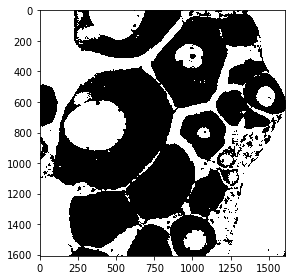

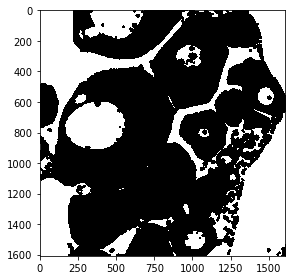

In [5]:
#erosion

eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded)

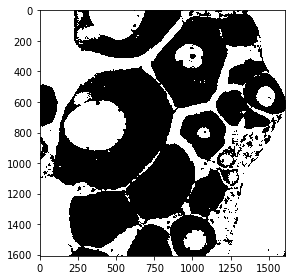

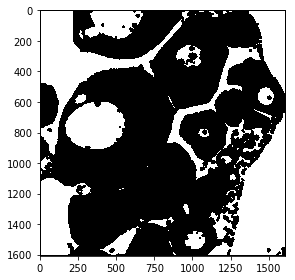

In [6]:
#binary erosion

eroded = binary_erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded)

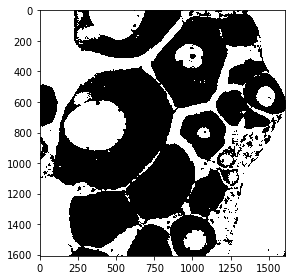

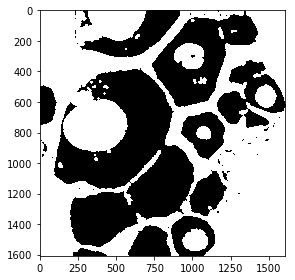

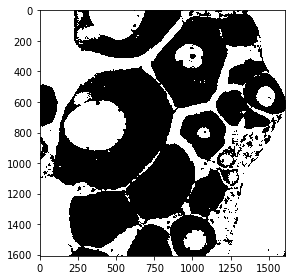

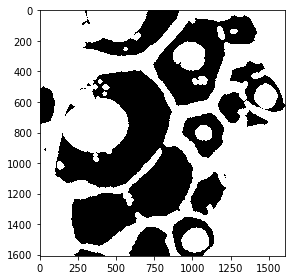

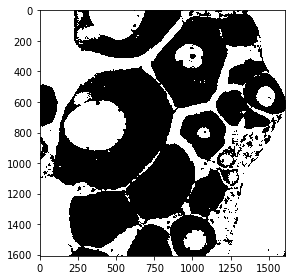

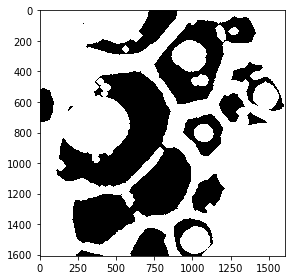

In [7]:
#dilatación

dilated = dilation(orig_phantom, selem)
dilated1 = dilation(dilated, selem2)
dilated2 = dilation(dilated1, selem2)

plot_comparison(orig_phantom, dilated)
plot_comparison(orig_phantom, dilated1)
plot_comparison(orig_phantom, dilated2)

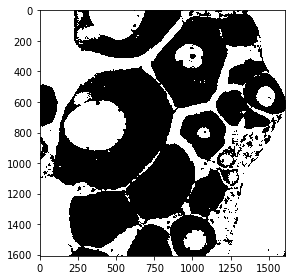

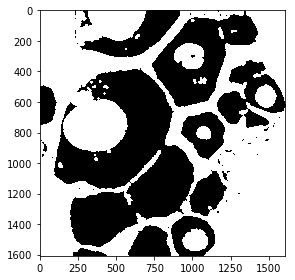

In [8]:
#binary_dilatación

dilated = binary_dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated)

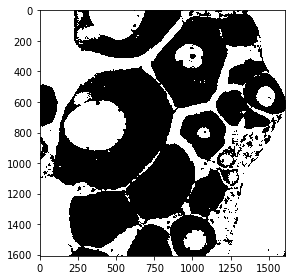

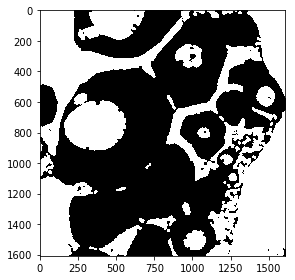

In [9]:
#apertura

opened = opening(orig_phantom, selem)
plot_comparison(orig_phantom, opened)

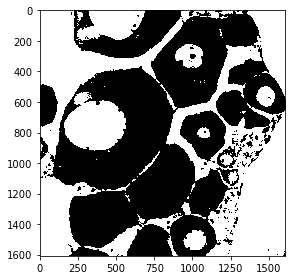

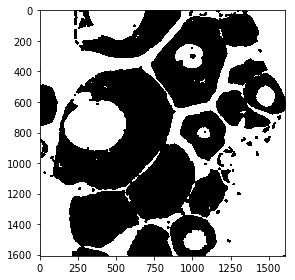

In [14]:
#cerrado

phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0

closed = closing(phantom, selem)
plot_comparison(phantom, closed)

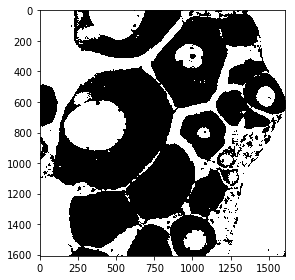

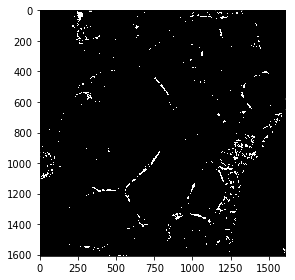

In [11]:
#Sombrero Blanco

phantom = orig_phantom.copy () 
phantom[340:350, 200:210] = 255 
phantom[100:110, 200:210] = 0

w_tophat = white_tophat(phantom, selem) 
plot_comparison(phantom, w_tophat)

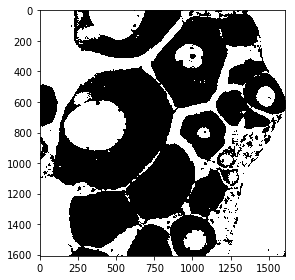

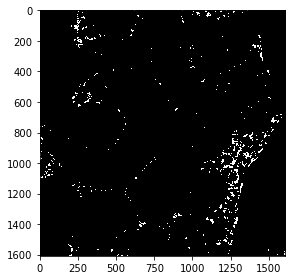

In [12]:
#Sombrero Negro

b_tophat = black_tophat(phantom, selem)
plot_comparison(phantom, b_tophat)

In [ ]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = orig_phantom

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
#segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
#print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
#ax[1, 0].imshow(mark_boundaries(img, segments_quick))
#ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
io.show()